# Machine learning to predict new crescent moon visibility

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# MACHINE LEARNING IMPORTS
#import sklearn
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

In [2]:
data_file = '..\\Data\\icouk_sighting_data_with_params.csv'
data = pd.read_csv(data_file)
#print(data.head(5))
data = data[data["Cloud Level"] <= 0.5]

data = data.drop(["Index","q","W","q'","W'"], axis = 1)
print(data.shape[0])
data.head(10)


330


,Date,Latitude,Longitude,Moon Age,Sunset,Moonset,Lag,Moon Alt,Moon Az,Sun Alt,Sun Az,Moon-Earth Dist,Sun-Moon Dist,ARCL,ARCV,DAZ,Parallax,Cloud Level,Seen
1,2.457339e+06,53.95763,-1.08271,1.687,2.457339e+06,2.457339e+06,57.80819,3.36486,235.23797,-3.31808,243.97528,0.00266,0.98725,10.99616,6.68294,8.73731,55.04632,0.5,Not_seen
2,2.457398e+06,53.95763,-1.08271,0.685,2.457398e+06,2.457398e+06,67.20869,3.82122,233.19221,-3.52379,236.46999,0.00252,0.98095,8.04228,7.34501,3.27778,58.03155,0.5,Not_seen
4,2.457428e+06,52.63860,-1.13169,1.736,2.457428e+06,2.457428e+06,93.09817,6.46498,246.07108,-5.86126,253.40983,0.00244,0.98427,14.33820,12.32624,7.33875,59.58563,0.0,Seen
6,2.457457e+06,51.87967,-0.41748,0.759,2.457457e+06,2.457457e+06,50.69011,3.53057,262.58959,-3.46038,267.74070,0.00240,0.99075,8.68183,6.99094,5.15110,60.83247,0.5,Not_seen
11,2.457487e+06,51.38333,-0.10000,1.807,2.457487e+06,2.457487e+06,93.35610,6.93008,277.18462,-6.20261,290.41010,0.00240,0.99931,18.61737,13.13269,13.22547,60.75082,0.5,Seen
13,2.457516e+06,51.38333,-0.10000,1.827,2.457516e+06,2.457516e+06,53.93830,3.53681,289.80555,-3.22250,302.83785,0.00241,1.00699,14.67415,6.75931,13.03231,60.72331,0.5,Not_seen
14,2.457516e+06,51.87967,-0.41748,1.829,2.457516e+06,2.457516e+06,53.90417,3.47958,290.07496,-3.17264,303.20246,0.00241,1.00699,14.71015,6.65223,13.12750,60.72596,0.5,Not_seen
17,2.457516e+06,51.13321,0.26256,1.826,2.457516e+06,2.457516e+06,53.92919,3.56241,289.67515,-3.24480,302.65364,0.00241,1.00699,14.64854,6.80721,12.97849,60.72245,0.5,Not_seen
18,2.457517e+06,50.85519,0.57292,2.847,2.457517e+06,2.457517e+06,124.12407,9.06082,285.85502,-7.22867,309.23662,0.00244,1.00742,28.42895,16.28949,23.38159,59.43039,0.0,Seen
19,2.457545e+06,53.70291,-1.63370,0.853,2.457545e+06,2.457545e+06,10.24025,0.12321,300.45692,-0.51104,311.51209,0.00244,1.01240,11.07323,0.63425,11.05517,59.95015,0.5,Not_seen


In [3]:
# Visualising a couple of variables.
variable_list =  data.columns.tolist() #['Hijri year', 'Month', 'Seen?','Lat','Lon']
 #print(variable_list)

# List of label options
ptype = [r"Seen", r"Not_seen"]

# Plot data
#diag_kind='kde'
showpairplot = False
if showpairplot == True:
   fig = sns.pairplot(data[variable_list], hue = 'Seen', palette = 'bright')

   # Change location of legend
   fig._legend.set_bbox_to_anchor((1.05, 0.5))

   # Add legend
   for t, l in zip(fig._legend.texts, ptype):
      t.set_text(str(t.get_text()) + " - " + str(l))


   plt.show()


In [4]:
# List of features without label feature
features = variable_list
features.remove('Seen')
#print(features)

X = data[features]
y = np.array(data['Seen'])

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1) # 80/20 training/test split

In [5]:
# Produce randomforest classifier model and fit to training data
# Keep the random_state=1 in your arguments
# gini or entropy
rf = RandomForestClassifier(n_estimators=100, criterion = 'gini', max_depth=12,random_state=1, oob_score=True)

# Fitting takes the input and "truth" data for classification purposes
rf.fit(x_train, y_train)

RandomForestClassifier(max_depth=12, oob_score=True, random_state=1)

In [6]:
# Produce predictions for the classification of your training dataset using your model:
y_pred = rf.predict(x_train)

# plot the accuracies of said predictions
print("Accuracy on training dataset:",metrics.accuracy_score(y_train, y_pred))
rf_acc_train = metrics.accuracy_score(y_train, y_pred)
y_pred = rf.predict(x_test)
print("Accuracy on testing dataset:",metrics.accuracy_score(y_test, y_pred))
rf_acc_test = metrics.accuracy_score(y_test, y_pred)

Accuracy on training dataset: 1.0
Accuracy on testing dataset: 0.9393939393939394


In [7]:
print('Oob Score: ', rf.score(x_test, y_test))

Oob Score:  0.9393939393939394


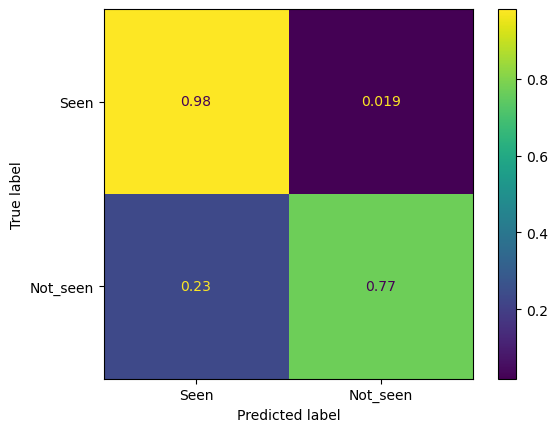

In [8]:
# plot your confusion matrix
cm = confusion_matrix(y_test, y_pred ,normalize = 'true')
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=ptype)
disp.plot()
plt.show()

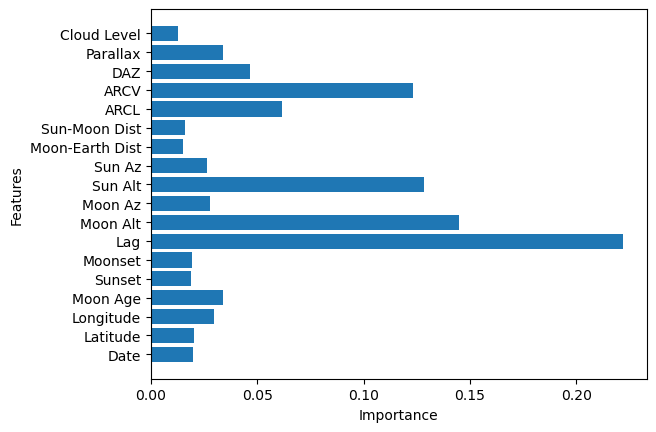

In [9]:
# Plot importance
importance = rf.feature_importances_
ytix = features

plt.barh(range(len(features)), importance)
plt.yticks(range(len(features)), features)
plt.xlabel("Importance")
plt.ylabel("Features")
plt.show()